In [95]:
import requests as rq
import bs4
from bs4 import BeautifulSoup as bs
import re
import numpy as np
import pandas as pd

In [2]:
url = 'https://www.npr.org/2010/01/18/122701268/i-have-a-dream-speech-in-its-entirety'

In [56]:
site = rq.get(url)

In [57]:
soup = bs(site.text , 'html.parser')

In [ ]:
soup.text

In [58]:
page = soup.find_all('div', attrs = {'id':'storytext', 'class':'storytext storylocation linkLocation'}) # this returns a list!

In [65]:
mm = page[0].find_all('p',recursive=False) # page has only one member | recursive=False : to avoid choosing children tags

In [66]:
len(mm)

30

In [70]:
text = mm[1].text.replace('\n','').strip()
for i in range(2,30):
  text += ' ' + mm[i].text.replace('\n','').strip()

In [72]:
text = text[29:]

In [102]:
text

"Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of their captivity. But 100 years later, the Negro still is not free. One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination. One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity. One hundred years later the Negro is still languished in the corners of American society and finds himself in exile in his own land. And so we've come here today to dramatize a shameful condition. In a sense we've come to our nation's capital to cash a check. When the architects of our republic wrote the magnificent words of the Constitution and the De

Now, we have the script of speech. So, let's analyze it:

In [ ]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer as TT

In [88]:
tk = TT()
token = tk.tokenize(text)

In [ ]:
token

In [97]:
en = stopwords.words('english')
j = ['every','.',',']
en += j
ind1 = en.index('i')
del(en[ind1])
ind2 = en.index('we')
del(en[ind2])
ind3 = en.index('will')
del(en[ind3])

In [98]:
# deleting non-important words
text_to = []
for word in token:
  if word.lower() not in en:
    text_to.append(word)

In [99]:
name = []
count = []
for i in range(0,len(text_to)):
  word = text_to[i]
  if word not in name:
    name.append(word)
    count.append(1)
  else:
    arg = name.index(word)
    count[arg] += 1

In [100]:
count1 = np.array(count)
name1 = np.array(name)
name2 = []
for i in range(0,len(count1)):
  argm = np.argmax(count1)
  nam = name1[argm]
  name2.append(nam)
  count1 = np.delete(count1, argm)
  name1 = np.delete(name1, argm)

In [101]:
count = np.array(count)
d = {'word': name2, 'count': -np.sort(-count)}
result = pd.DataFrame(data=d)
result

,word,count
0,will,25
1,freedom,19
2,we,18
3,I,14
4,Negro,13
...,...,...
472,old,1
473,spiritual,1
474,Thank,1
475,God,1


(-0.5, 399.5, 199.5, -0.5)

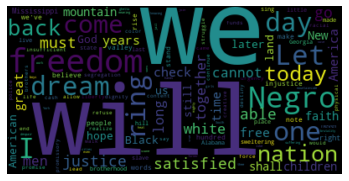

In [104]:
from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(collocations = False,stopwords=en).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")